In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
#from scipy.stats import randint
RSEED = 45


In [2]:
#pip install forestci
import forestci as fci


Failed to import duecredit due to No module named 'duecredit'


In [3]:
# import the file
df = pd.read_csv('data/kickstarter_modeling.csv')
df.head()

,funding_goal,outcome,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,1000,0,39,2009,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,80000,0,87,2009,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,20,1,8,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,99,1,79,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1900,0,28,2009,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.isnull().sum()

funding_goal              0
outcome                   0
funding_period            0
launch_year               0
category_Comics           0
                         ..
country_Spain             0
country_Sweden            0
country_Switzerland       0
country_United Kingdom    0
country_United States     0
Length: 197, dtype: int64

In [5]:
X = df.drop('outcome', axis=1)
y = df['outcome']
X.shape, y.shape

((331462, 196), (331462,))

## Splitting the Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=RSEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((248596, 196), (82866, 196), (248596,), (82866,))

## Fitting and Evaluating the Model

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
#y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6500736128206985


Visualising Results

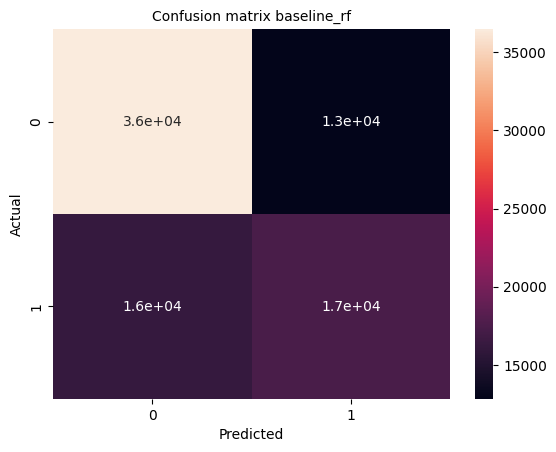

In [10]:
conf_matrix= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.title("Confusion matrix baseline_rf", fontsize =10)
sns.heatmap(conf_matrix, annot=True);

## Visualising baseline rf model results

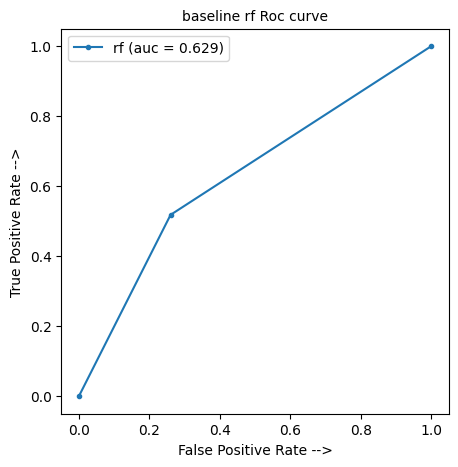

In [11]:
from sklearn.metrics import roc_curve, auc
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred)
auc_rf = auc(rf_fpr, rf_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_fpr, rf_tpr, marker='.', label='rf (auc = %0.3f)' % auc_rf)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("baseline rf Roc curve", fontsize =10)
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.74      0.69      0.72     52646
           1       0.52      0.58      0.55     30220

    accuracy                           0.65     82866
   macro avg       0.63      0.63      0.63     82866
weighted avg       0.66      0.65      0.65     82866



## Hyperparameter Tuning

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter grid
param_grid = {
    'n_estimators': np.arange(10, 201).astype(int),
   'max_depth': [None] + list(np.arange(3, 21).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.arange(10, 51).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

 #Estimator for use in random search
estimator = RandomForestClassifier()

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'precision', cv = 5, 
                        n_iter = 10, verbose = 5, random_state=RSEED)
#Fit 
rs.fit(X_train, y_train)

In [28]:
# Print the best hyperparameters
print('Best rf hyperparameters:',  rs.best_params_)

Best rf hyperparameters: {'n_estimators': [155], 'max_depth': [17], 'max_features': [7999999999999999], 'max_leaf_nodes': [None], 'min_samples_split': [5], 'bootstrap': [False]}


In [35]:
# Assuming you have found the best hyperparameters through grid search

rs.best_params_ = {
 'n_estimators': 155,
 'max_depth': 17,
 'max_features': 7999999999999999,
 'max_leaf_nodes': None ,
 'min_samples_split': 5,
 'bootstrap': False
}

In [36]:
# Create a Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**rs.best_params_)


In [37]:
best_rf_classifier.fit(X_train, y_train)
#predictions = rf_classifier.predict(X_test)

RandomForestClassifier(bootstrap=False, max_depth=17,
                       max_features=7999999999999999, min_samples_split=5,
                       n_estimators=155)

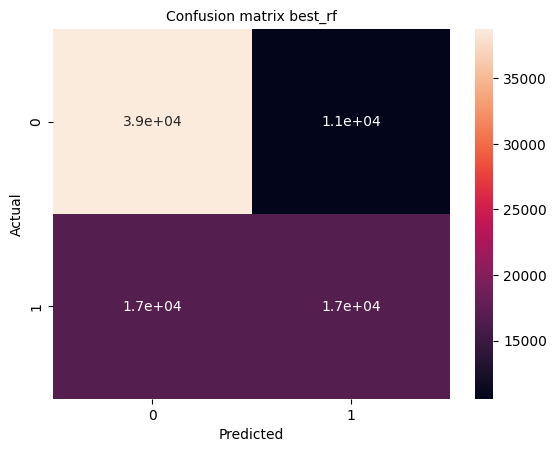

In [38]:
# Generate predictions with the best model
y_pred = best_rf_classifier.predict(X_test)
# Create the confusion matrix
conf_matrix= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.title("Confusion matrix best_rf", fontsize =10)
sns.heatmap(conf_matrix, annot=True);

In [42]:
test_accuracy = best_rf_classifier.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.6698042623029952


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74     55541
           1       0.50      0.61      0.55     27325

    accuracy                           0.67     82866
   macro avg       0.64      0.66      0.64     82866
weighted avg       0.69      0.67      0.68     82866



<Axes: >

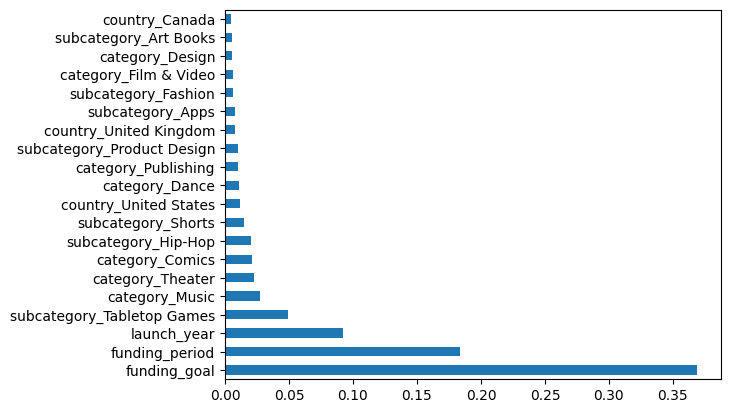

In [46]:
feat_importances = pd.Series(best_rf_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
